In [203]:
import imageio
# from scipy.misc import imread, imresize
import cv2
import matplotlib.pyplot as plt

Both of these methods will read the image into a NumPy array, but the array returned by opencv will be in BGR color format by default, 

while the array returned by imageio will be in RGB format.

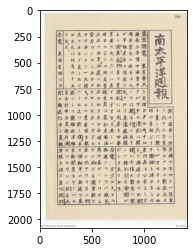

In [204]:
img = imageio.imread('Jap_hw/g1/J61.jfif')
img_cropped = imageio.imread('Jap_hw/g1/J61_cropped.jfif')

plt.imshow(img)

# Displaying the image

#### Importing PyTorch relevent libraries 

In [205]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import os
from PIL import Image
import numpy as np

# Set the device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [206]:
num_epochs = 10
batch_size = 10
learning_rate = 0.001

#### Define Customized Dataset for loading the images

In [207]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform):
        self.data = []
        self.targets = []
        for filename in os.listdir(data_dir):
            # label_dir = os.path.join(data_dir, label)
            # for filename in os.listdir(label_dir):
            self.data.append(os.path.join(data_dir, filename))
            self.targets.append( int(filename[:3]) )
        
        print(self.targets)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):

        image_path = self.data[index]
        target = self.targets[index]

        with open(image_path, 'rb') as f:
            image = Image.open(f).convert('L')
        if self.transform is not None:
            image = self.transform(image)
        # print(target)
        return image, target

# Define the path to your image data
data_dir = 'CERUG_dataset/Task1/'

# Define the transformations to be applied to the images
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((224, 224)),
        transforms.Normalize(mean = (0.5,), std = (0.5,))
])

target_transform = transforms.ToTensor()

# Use the custom dataset class to load the data
train_data = CustomDataset(os.path.join(data_dir, 'Task1_Training'), transform)

test_data = CustomDataset(os.path.join(data_dir, 'Task1_Validation/Training'), transform)

# Define the dataloaders to iterate over the data in batches
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# # Example usage
# for images, labels in train_loader:
#     # Your code here
#     pass
print(len(train_loader))
for batch_data in train_loader:
        imgs, label = batch_data
        print("imngs: ", imgs)
        print("label: ", label)
        print(type(label))


[13, 4, 8, 1, 16, 37, 20, 29, 25, 32, 14, 3, 6, 11, 18, 39, 30, 27, 22, 35, 26, 38, 31, 34, 40, 23, 2, 15, 10, 19, 7, 21, 28, 36, 33, 24, 5, 12, 17, 9, 28, 21, 36, 33, 24, 5, 12, 17, 9, 26, 31, 38, 34, 40, 23, 2, 15, 19, 10, 7, 14, 3, 6, 18, 11, 30, 39, 27, 22, 35, 13, 4, 1, 8, 16, 37, 29, 20, 25, 32]
[62, 43, 54, 58, 51, 46, 60, 65, 44, 53, 56, 41, 48, 52, 45, 49, 57, 61, 64, 55, 42, 47, 59, 50, 63, 55, 42, 47, 50, 59, 63, 52, 45, 49, 57, 61, 64, 60, 65, 44, 53, 56, 48, 41, 62, 43, 54, 51, 58, 46]
8
imngs:  tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]]],


        [[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
     

In [208]:
num_classes = len(set(train_data.targets + test_data.targets)) + 1
print(num_classes)

class_list = set(train_data.targets + test_data.targets)

print(class_list)

66
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65}


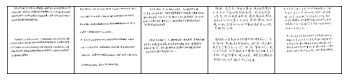

In [209]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

def show(dataset, num_images=5):
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=num_images, shuffle=True)
    images, labels = next(iter(dataloader))
    grid = vutils.make_grid(images, padding=2, normalize=True)
    np_grid = grid.cpu().numpy()
    plt.imshow(np.transpose(np_grid, (1, 2, 0)))
    plt.axis('off')
    plt.show()

show(train_data)



#### Define the model architecture, here we are using LeNet structure

In [210]:

#Defining the convolutional neural network
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(44944, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [211]:
model = LeNet5(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [212]:
#this is defined to print how many steps are remaining when training
total_step = len(train_loader)
print(len(train_loader)) # 3 batches, each has 64 images

8


In [213]:
# train the model
def train(model, train_loader, criterion, optimizer, num_epochs, device):
    for epoch in range(num_epochs):
        model.train()

        correct = 0
        # total = 0
        epoch_loss = 0.0

        for i, (images, labels) in enumerate(train_loader):
            # print(i)
            # print(len(images))
            images = images.to(device)
            # print(images.shape)
            labels = labels.to(device)
            
            #Forward pass
            outputs = model(images)
            # print(outputs.shape)
            loss = criterion(outputs, labels)
                
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Computing epoch loss
            epoch_loss += loss.item()
            '''
            'output' tensor has dimensions (batch_size, num_classes)

            output.data is used to obtain a new tensor that shares the same data with
            the output tensor, but output.data is detached from the computational graph.

            This is done to avoid accumulating gradients in the 'outout' tensor, which
            is not a leaf tensor and therefore cannot be used to compute gradients during
            backpropagation.

            In the below line, we use torch.max to obtian the predictions of the model using
            'torch.max'. 'torch.max' requires a tensor with require_tensor=False(i.e. a tensor 
            that is not attached to the computational graph).

            If we used 'output' directly, the gradient will accumulate in 'output' during backpropagation,
            which could cause unnecessary memory usage and slowdowns.

            In some cases, it can be written in the form of the following:
            with torch.no_grad():
                        preds = logits.argmax(-1)
                        accuracy = compute_accuracy(labels, preds)

            '''
            # get predicted label
            _, predicted = torch.max(outputs.data, dim = 1)
            '''
            e.g.
            suppose we have a batch of two images and the model outputs:

            # output = tensor([[0.1, 0.2, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.3, 0.1],
                                [0.05, 0.05, 0.2, 0.05, 0.05, 0.05, 0.05, 0.3, 0.1, 0.25]])

            the perdicted label can be obtained by using 'torch.max' with 'dim = 1'
            which is essentially finding the max value's index along rows

            # _, predicted = torch.max(outputs.data, dim = 1)

            in this case
            # predicted = tensor([8, 7])
            '''
            # Calculating accuracy with total and correct
            '''
            'total' is used to keep track of the total number of examples seen so far
            in the current epoch, that is we add the size of current batch to 'total'.

            'labels' is the true labels for the current batch. 
            The '.size(0)' method returns the size of the first dimension of a tensor, 
            which is the batch size.
            '''
            # total += labels.size(0)
            '''
            'correct' keeps track of the number of correctly classified examples so far
            in the current epoch. '(predicted == target)' returns a tensor of the same shape
            as 'perdicted' and 'labels' with values of True and False. We use the sum() method
            to count the number of True values in the tensor, which gives the number of correctly
            classified images.

            we use the '.item()' method to convert the result to a Python scalar and add it to correct.
            '''
            correct += (predicted == labels).sum().item()
            ## using steps
            # if (i+1) % 100 == 0:
            #     print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
            # 		           .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            ## or using nums of images

            if i % 10 == 0:
                print('Train Epoch: [{}/{}], Step[{}/{}], Data[{}/{} ({:.0f}%)]\tLoss: {:.4f}'.format(
                    epoch+1, num_epochs, i+1, total_step, i * len(images), len(train_loader.dataset),
                    100. * i / len(train_loader), loss.item()))
        # calculate accuracy and average epoch_loss after each epoch
        '''
        total = len(train_loader.dataset) 60000
        len(train_loader) is the number of batches 938
        '''
        epoch_loss /= len(train_loader) # average batch loss
        accuracy = 100. * correct / len(train_loader.dataset)
        print('Epoch: {}/{}\tAverage Batch Loss: {:.4f}\tAccuracy: {}/{} ({:.2f}%)'.format(
        epoch+1, num_epochs, epoch_loss, correct, len(train_loader.dataset), accuracy))


# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
# Define the testing function
def test(model, test_loader, criterion, device):
    # Set the model to eval() mode 
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        # total = 0
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            print(predicted)

            loss = criterion(outputs, labels)
            test_loss += loss.item()

           
            # total += labels.size(0)
            correct += (predicted == labels).sum().item()
        '''
        total = len(test_loader.dataset) 10000
        len(test_loader) is the number of test batches 157
        '''
        # print(len(test_loader))
        test_loss /= len(test_loader)
        test_accuracy = 100 * correct / len(test_loader.dataset)
        print('\nTest set -- Average Batch Loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            test_accuracy))

        # print('Accuracy of the network on the 10000 test images: {} %'.format(test_accuracy))



In [214]:
def main():
    train(model, train_loader, criterion, optimizer, num_epochs, device)
    test(model, test_loader, criterion, device)


if __name__ == '__main__' :
    main()

Train Epoch: [1/10], Step[1/8], Data[0/80 (0%)]	Loss: 4.2219
Epoch: 1/10	Average Batch Loss: 7.9084	Accuracy: 0/80 (0.00%)
Train Epoch: [2/10], Step[1/8], Data[0/80 (0%)]	Loss: 4.8961
Epoch: 2/10	Average Batch Loss: 4.1026	Accuracy: 4/80 (5.00%)
Train Epoch: [3/10], Step[1/8], Data[0/80 (0%)]	Loss: 2.9004
Epoch: 3/10	Average Batch Loss: 3.3679	Accuracy: 10/80 (12.50%)
Train Epoch: [4/10], Step[1/8], Data[0/80 (0%)]	Loss: 3.1134
Epoch: 4/10	Average Batch Loss: 2.6863	Accuracy: 27/80 (33.75%)
Train Epoch: [5/10], Step[1/8], Data[0/80 (0%)]	Loss: 2.2377
Epoch: 5/10	Average Batch Loss: 2.1831	Accuracy: 32/80 (40.00%)
Train Epoch: [6/10], Step[1/8], Data[0/80 (0%)]	Loss: 1.7037
Epoch: 6/10	Average Batch Loss: 1.5071	Accuracy: 55/80 (68.75%)
Train Epoch: [7/10], Step[1/8], Data[0/80 (0%)]	Loss: 0.9025
Epoch: 7/10	Average Batch Loss: 1.0299	Accuracy: 66/80 (82.50%)
Train Epoch: [8/10], Step[1/8], Data[0/80 (0%)]	Loss: 1.1948
Epoch: 8/10	Average Batch Loss: 0.5814	Accuracy: 71/80 (88.75%)
Trai